#**CIENCIA Y ANALÍTICA DE DATOS - MIGUEL MARINES**
##**<u>Análisis de Variables</u>**
---
---
*   Análisis Descriptivo (Univariante)
    *   Variables Numéricas
        *   Tendencia Central (media, mediana)
        *   Dispersión o Variabilidad (min, max, desviación estándar, cuartiles)
        *   Forma (asimetría y curtosis)
        *  Clasificación según asimetría y curtosis
        *  [Gráficar todo lo anterior]
    *   Variables Categóricas
        *   Tendencia Central (moda)
        *   Cardinalidad (cantidad de valores únicos)
        *   Recuentos Únicos (número de ocurrencias para cada valor único)
        *  [Gráficar todo lo anterior]
*   Análisis de Correlación (Bivariante y Multivariante)
    *   Variables Numéricas y Categóricas
    *  [Gráficar todo lo anterior (mapas de calor, box plots, etc. )]
---
---

In [ ]:
# Google Drive en Google Colab.
# Acceso a los archivos y directorios almacenados en Google Drive desde un notebook de Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Biblioteca para interactuar y realizar operaciones relacionadas con el sistema operativo.
# Permite trabajar con archivos, directorios y realizar tareas a nivel de sistema.
import os
# Nuevo directorio.
DIR = "/content/drive/MyDrive/Ciencia_Analitica_Datos"
# Cambio de directorio de trabajo.
os.chdir(DIR)

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# DataFrame
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis Descriptivo (Univariante)

1. Se utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

*   8 Columnas Numéricas
*   4 Columnas Cualitativas


In [ ]:
# .info()  -  Muestra tipos de datos y valores faltantes en un DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Se determina el porcentaje de valores faltantes por columna.

In [ ]:
# Número de valores faltantes por columna.
missing_values = df.isnull().sum()

# Porcentaje de valores faltantes por columna.
percentage_missing = (missing_values / len(df)) * 100

percentage_missing

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

# Análisis de Variables Numéricas

3. Se obtienen las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia Central (media, mediana)
*   Dispersión o Variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Se clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis.

**NOTA**. Muchas de estas estadísticas, se pueden obtener utilizando la función `describe()` y la mediana está representada en el 2do cuartil (50%).

In [ ]:
# Cálculo de la meadia, min, max, desviación estándar y cuartiles.
summary = df.describe()

# Cálculo de la mediana.
# La mediana es igual al 2do cuarti(50%).
median = summary.loc['50%'].copy()
median.name = 'median'

# Cálculo de la asimetría.
asimetria = df.skew(numeric_only = True)
asimetria.name = 'asimetria'

# Cálculo de la curtosis.
curtosis = df.kurtosis(numeric_only = True)
curtosis.name = 'curtosis'

# Unión de los resultados en summary.
summary = summary.append(median)
summary = summary.append(asimetria)
summary = summary.append(curtosis)

# Ordenar como se pide en la pregunta.
order = ['count', 'mean', 'median', 'min', 'max', 'std', '25%', '50%', '75%', 'asimetria', 'curtosis']
summary = summary.loc[order]

# Mostrar resultado transpuesto.
summary.T

<ipython-input-57-d306dbc92056>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(median)
<ipython-input-57-d306dbc92056>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(asimetria)
<ipython-input-57-d306dbc92056>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(curtosis)


,count,mean,median,min,max,std,25%,50%,75%,asimetria,curtosis
person_age,32581.0,27.734600,26.00,20.00,144.00,6.348078,23.00,26.00,30.00,2.581393,18.560825
person_income,32581.0,66074.848470,55000.00,4000.00,6000000.00,61983.119168,38500.00,55000.00,79200.00,32.865349,2693.272776
person_emp_length,31686.0,4.789686,4.00,0.00,123.00,4.142630,2.00,4.00,7.00,2.614455,43.722338
loan_amnt,32581.0,9589.371106,8000.00,500.00,35000.00,6322.086646,5000.00,8000.00,12200.00,1.192477,1.423565
loan_int_rate,29465.0,11.011695,10.99,5.42,23.22,3.240459,7.90,10.99,13.47,0.208550,-0.671609
loan_status,32581.0,0.218164,0.00,0.00,1.00,0.413006,0.00,0.00,0.00,1.364888,-0.137088
loan_percent_income,32581.0,0.170203,0.15,0.00,0.83,0.106782,0.09,0.15,0.23,1.064669,1.223687
cb_person_cred_hist_length,32581.0,5.804211,4.00,2.00,30.00,4.055001,3.00,4.00,8.00,1.661790,3.716194


In [ ]:
# Calculo de la asimetría (skewness) y curtosis (kurtosis) para person age.
asimetria_age = df['person_age'].skew()
curtosis_age = df['person_age'].kurtosis()

# Calculo de la asimetría (skewness) y curtosis (kurtosis) para loan in rate.
asimetria_rate = df['loan_int_rate'].skew()
curtosis_rate = df['loan_int_rate'].kurtosis()

# Criterios de clasificación.
def clasificacion_asimetria(valor):
    if valor > 0:
        return 'Asimétrica Positiva (Cola Derecha)'
    elif valor < 0:
        return 'Asimétrica Negativa (Cola Izquierda)'
    elif valor == 0:
        return 'Simétrica'

def clasificacion_curtosis(valor):
    if valor > 0:
        return 'Leptocúrtica'
    elif valor == 0:
        return 'Mesocúrtica'
    elif valor < 0:
        return 'Platicúrtica'

# Clasificación de las variables según los valores de asimetría y curtosis
clasificacion_age_asimetria = clasificacion_asimetria(asimetria_age)
clasificacion_age_curtosis = clasificacion_curtosis(curtosis_age)

clasificacion_rate_asimetria = clasificacion_asimetria(asimetria_rate)
clasificacion_rate_curtosis = clasificacion_curtosis(curtosis_rate)

# Mostrar Resultados.
print("Clasificación de person_age según asimetría:", clasificacion_age_asimetria)
print("Clasificación de person_age según curtosis:", clasificacion_age_curtosis)

print("\nClasificación de loan_in_rate según asimetría:", clasificacion_rate_asimetria)
print("Clasificación de loan_in_rate según curtosis:", clasificacion_rate_curtosis)


Clasificación de person_age según asimetría: Asimétrica Positiva (Cola Derecha)
Clasificación de person_age según curtosis: Leptocúrtica

Clasificación de loan_in_rate según asimetría: Asimétrica Positiva (Cola Derecha)
Clasificación de loan_in_rate según curtosis: Platicúrtica


4. Se utilizan histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Corresponde lo obtenido en el cálculo de asimetría? Si

Los datos reales son más complejos que la teoría. Por esta razón, siempre se debe de acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. También se pueden ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

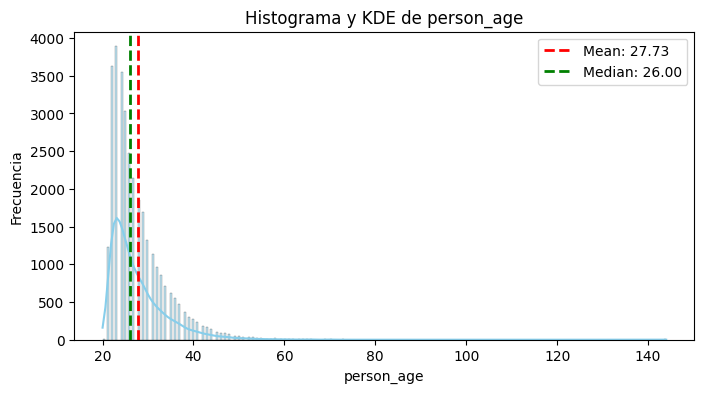

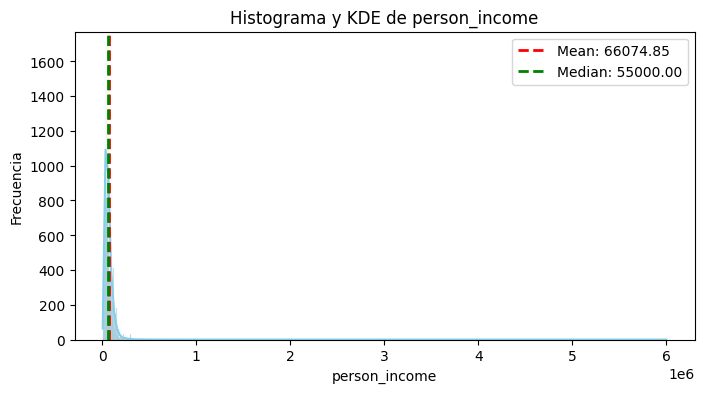

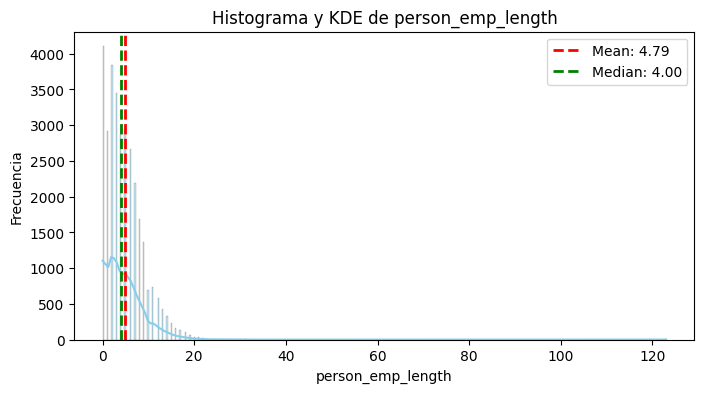

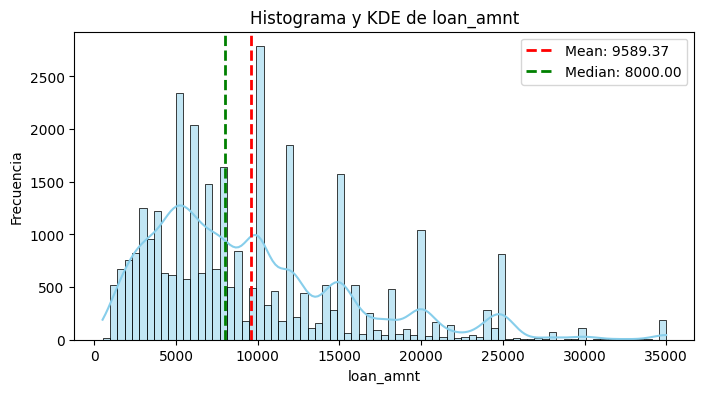

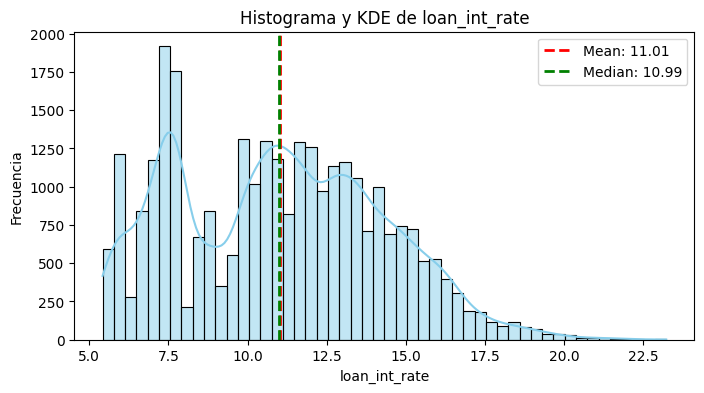

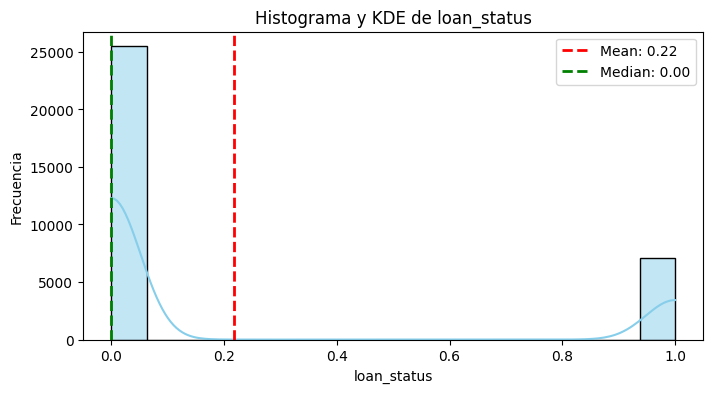

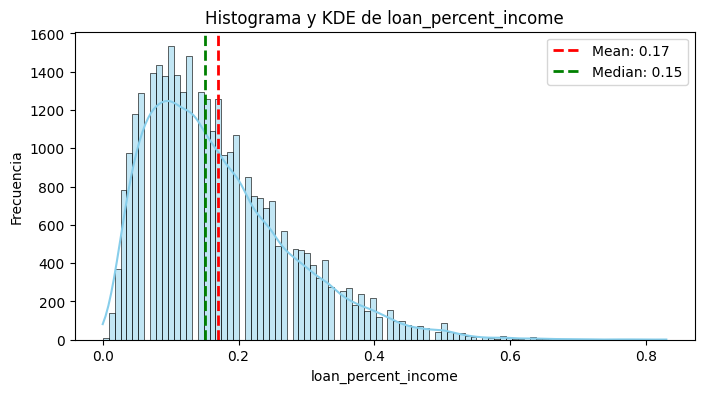

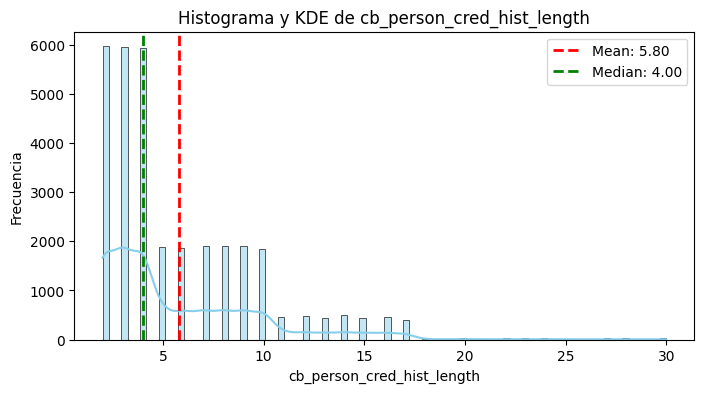

In [ ]:
# Variables a analizar y graficar del DataFrame.
variables_to_analyze = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length'
]

# Histogramas y KDE para cada variable.
for variable in variables_to_analyze:
    plt.figure(figsize = (8, 4))

    # Gráfica con histograma y KDE.
    sns.histplot(data = df, x = variable, kde = True, color = 'skyblue')

    # Calculo del mean y median.
    mean_value = df[variable].mean()
    median_value = df[variable].median()

    # Añadir al gráfico el mean y median.
    plt.axvline(mean_value, color = 'red', linestyle = 'dashed', linewidth = 2, label = f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color = 'green', linestyle = 'dashed', linewidth = 2, label = f'Median: {median_value:.2f}')

    # Contrucción de la visualiización de la gráfica.
    plt.title(f'Histograma y KDE de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

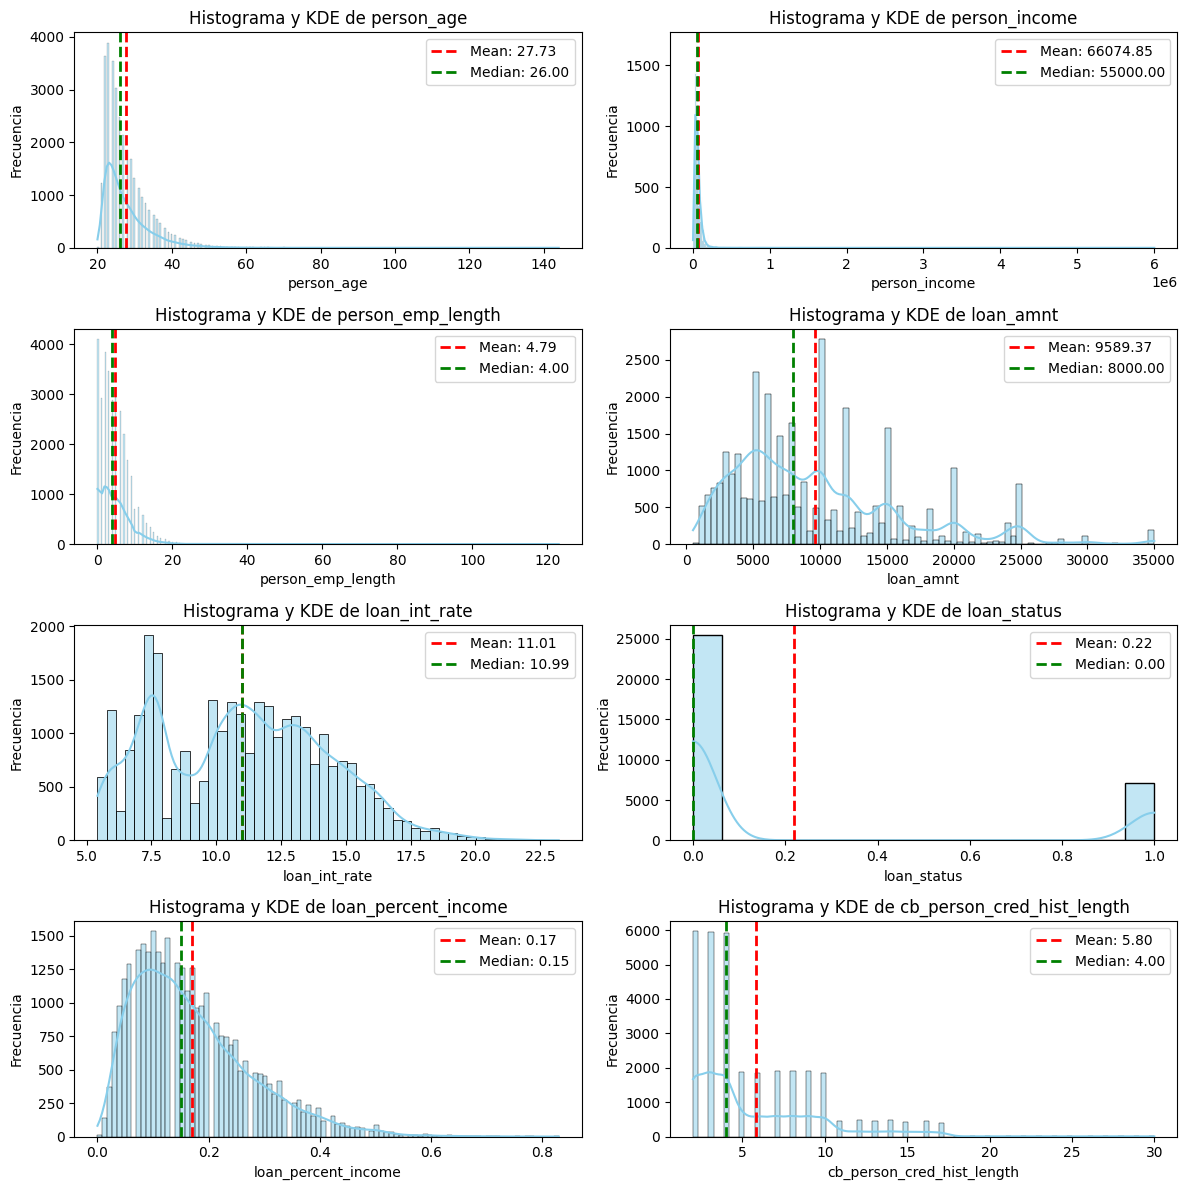

In [ ]:
# OTRA FORMA DE MOSTRAR LAS TABLAS.
# Variables a analizar y graficar del DataFrame.
variables_to_analyze = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length'
]

# Crear subplots para los gráficos
fig, axes = plt.subplots(4, 2, figsize = (12, 12))
axes = axes.ravel()

# Histogramas y KDE para cada variable.
for i, variable in enumerate(variables_to_analyze):
    # Gráfica con histograma y KDE.
    sns.histplot(data = df, x = variable, kde = True, color = 'skyblue', ax = axes[i])

    # Calculo del mean y median.
    mean_value = df[variable].mean()
    median_value = df[variable].median()

    # Añadir al gráfico el mean y median.
    axes[i].axvline(mean_value, color = 'red', linestyle = 'dashed', linewidth = 2, label = f'Mean: {mean_value:.2f}')
    axes[i].axvline(median_value, color = 'green', linestyle = 'dashed', linewidth = 2, label = f'Median: {median_value:.2f}')

    # Contrucción de la visualización de la gráfica.
    axes[i].set_title(f'Histograma y KDE de {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

5. Se emplean boxplots para mostrar la distribución de los datos a través de sus cuartiles.

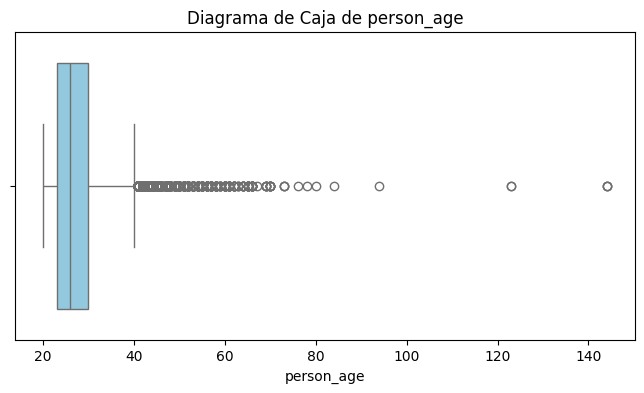

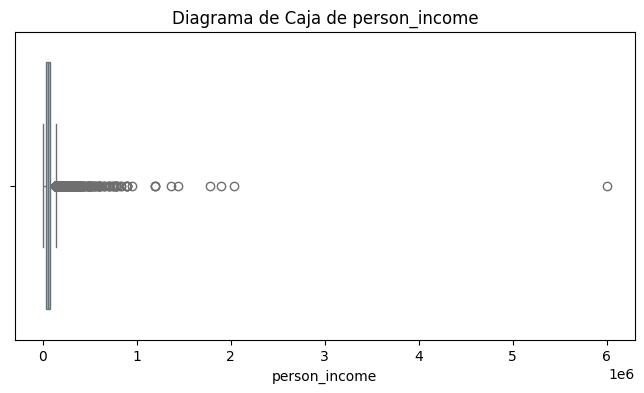

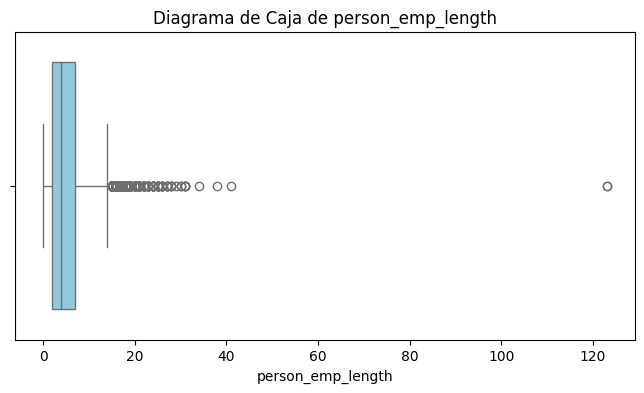

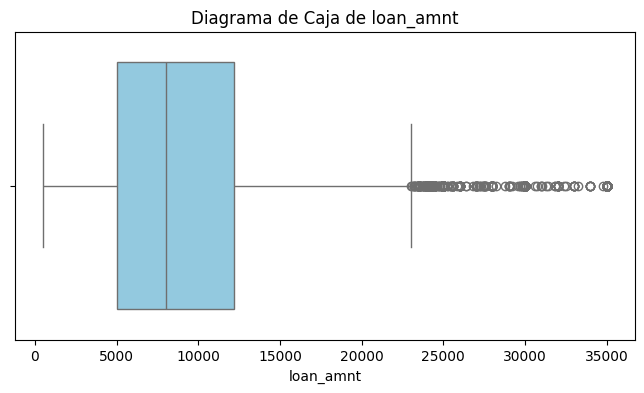

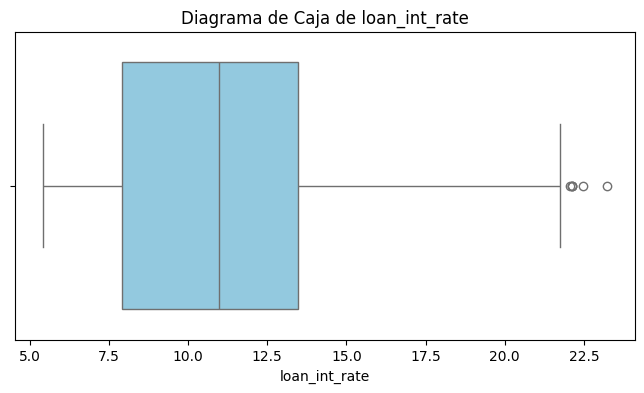

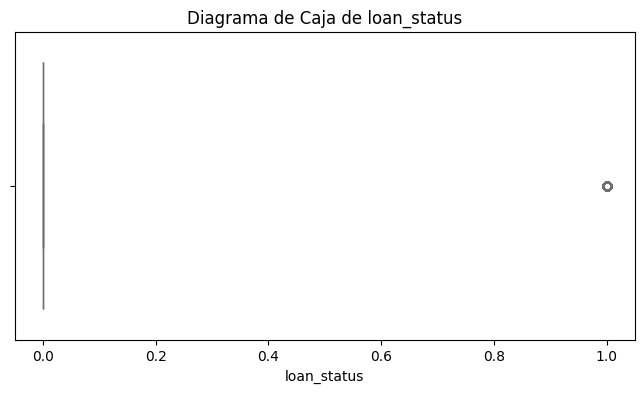

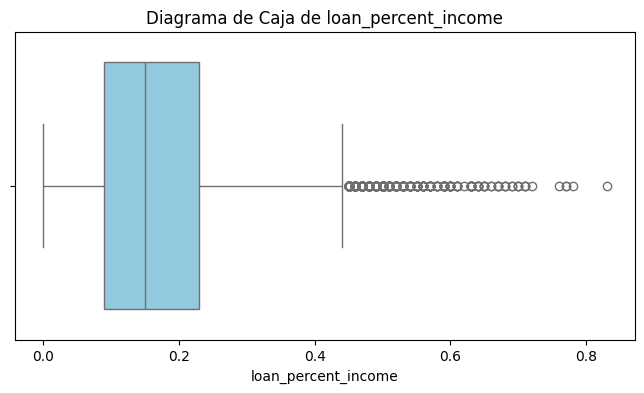

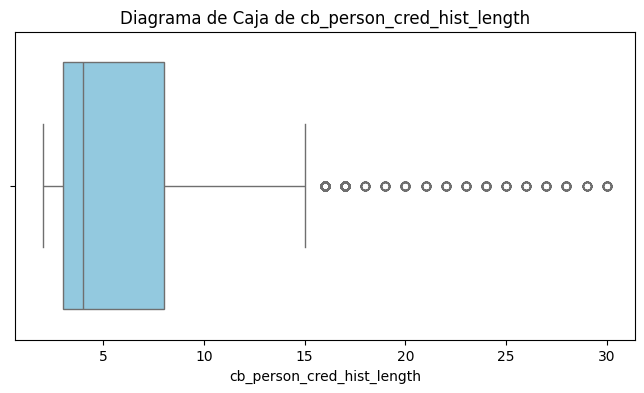

In [ ]:
# Variables a analizar y graficar del DataFrame.
variables_to_analyze = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length'
]

# Boxplots para cada variable.
for variable in variables_to_analyze:
    plt.figure(figsize = (8, 4))

    # Boxplot
    sns.boxplot(data = df, x = variable, color = 'skyblue')

    # Contrucción de la visualiización de la gráfica.
    plt.title(f'Diagrama de Caja de {variable}')
    plt.xlabel(variable)
    plt.show()

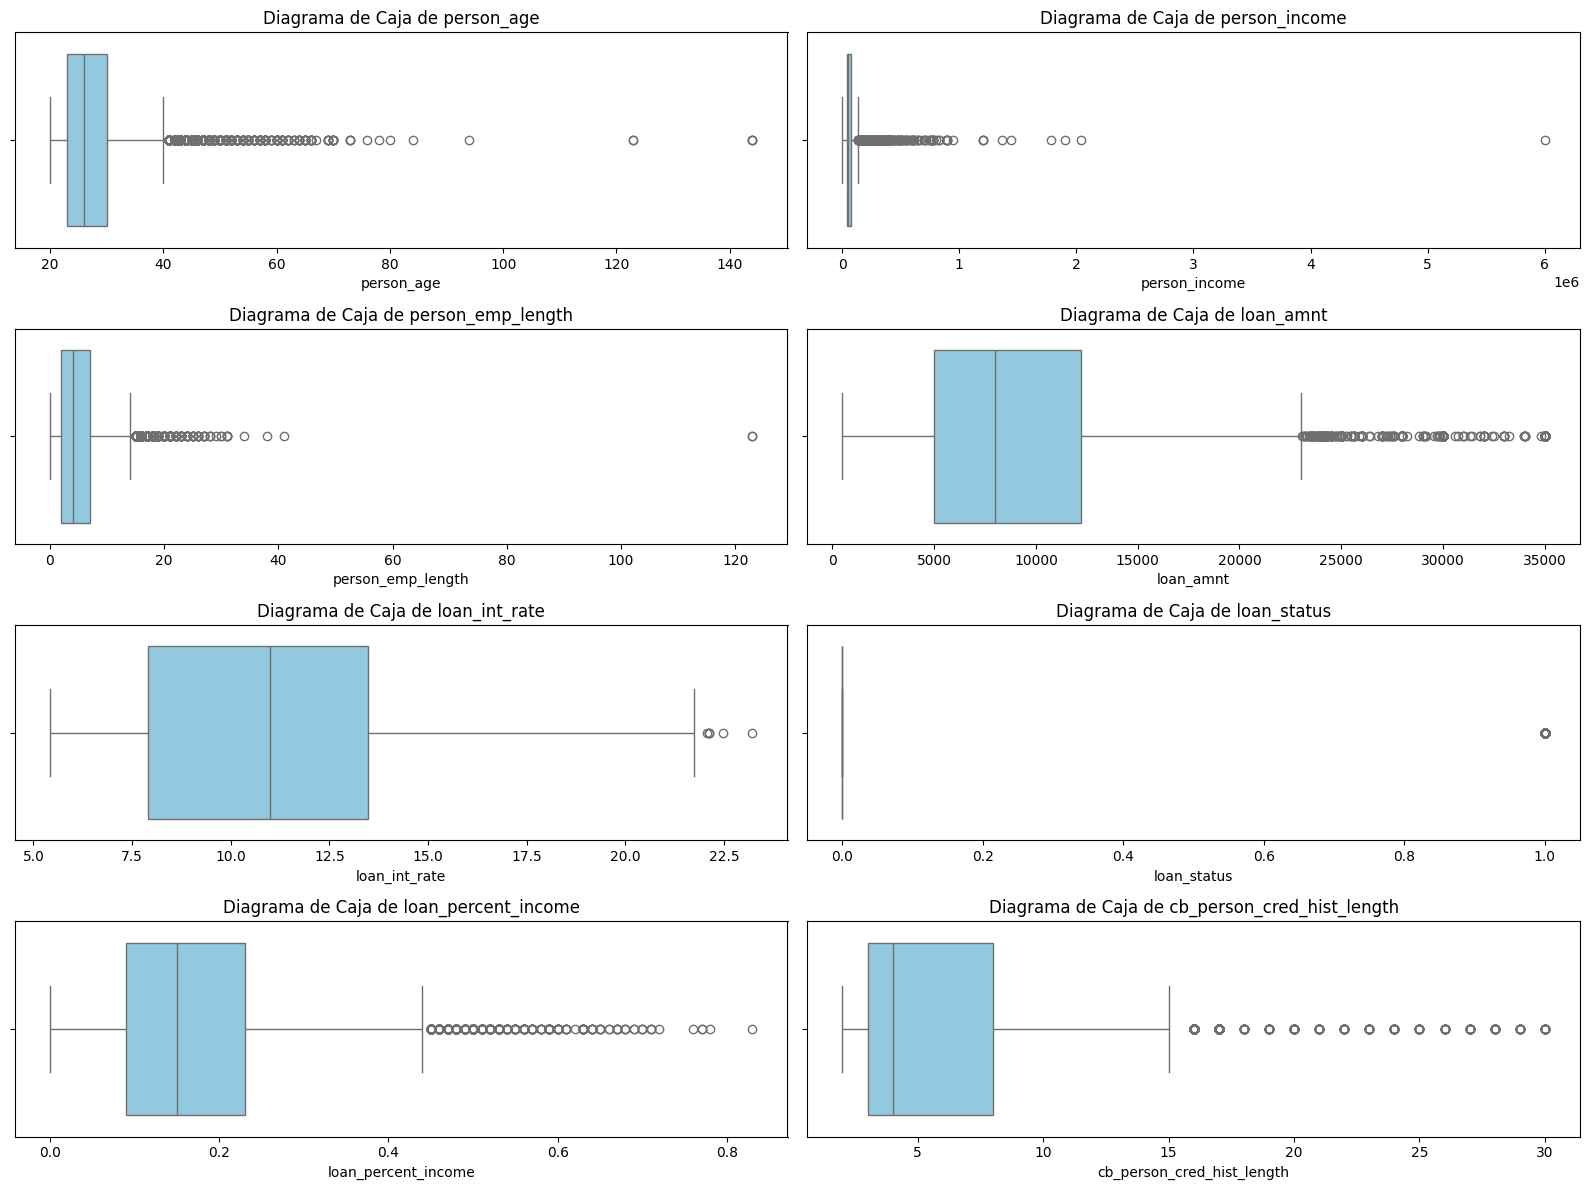

In [ ]:
# OTRA FORMA DE MOSTRAR LAS TABLAS.
# Variables a analizar y graficar del DataFrame.
variables_to_analyze = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length'
]

# Crear subplots para los gráficos
fig, axes = plt.subplots(4, 2, figsize = (16, 12))
axes = axes.ravel()

# Boxplots para cada variable.
for i, variable in enumerate(variables_to_analyze):
    # Boxplot
    sns.boxplot(data = df, x = variable, color = 'skyblue', ax = axes[i])

    # Contrucción de la visualización de la gráfica.
    axes[i].set_title(f'Diagrama de Caja de {variable}')
    axes[i].set_xlabel(variable)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


*   Como se puede observar hay valores atípicos en todas las variables. Se ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`.

In [ ]:
# Identificación valores atípicos.
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)

iqr = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de Variables Categóricas

 6. Se obtienen las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia Central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos Únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, se pueden obtener indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos se utiliza la función `df["columna"].value_counts()`

In [ ]:
# Tendencia central (moda)
# Cardinalidad (cantidad de valores únicos)
df.describe(include = 'object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [ ]:
# Recuentos únicos (número de ocurrencias para cada valor único).
df["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [ ]:
# Recuentos únicos (número de ocurrencias para cada valor único).
df["loan_intent"].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [ ]:
# Recuentos únicos (número de ocurrencias para cada valor único).
df["loan_grade"].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [ ]:
# Recuentos únicos (número de ocurrencias para cada valor único).
df["cb_person_default_on_file"].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

7. Se utilizan gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo se debe indicar la columna: `sns.countplot(x="columna", data=df) `

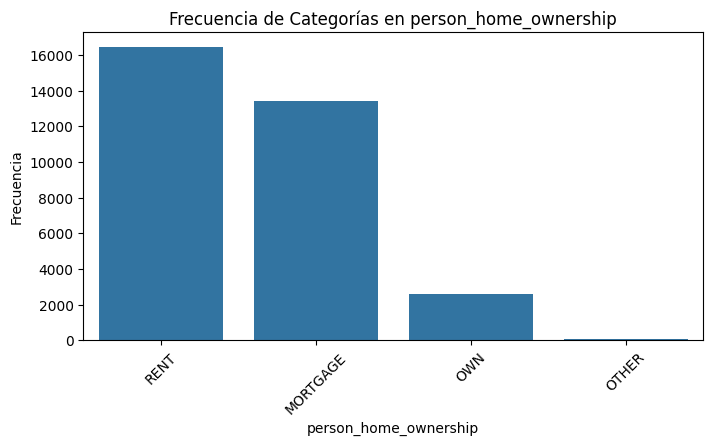

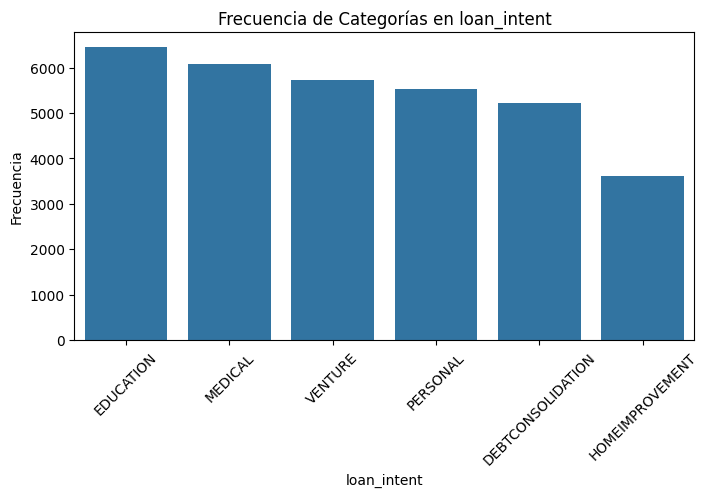

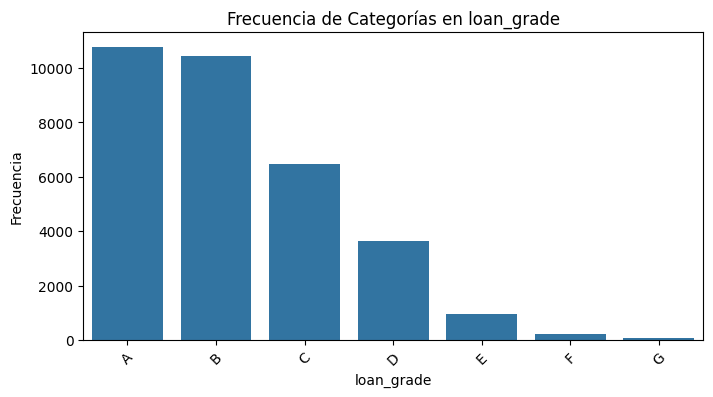

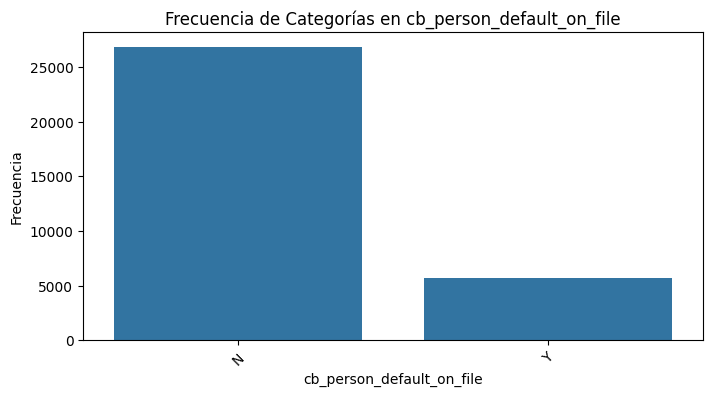

In [ ]:
# Variables categóricas
categorical_variables = df.select_dtypes(include = ['object']).columns.tolist()

# Gráficas de barras para cada variable categórica.
for variable in categorical_variables:
    plt.figure(figsize = (8, 4))

    # Frecuencia de cada categoría y ordenarla de mayor a menor.
    category_counts = df[variable].value_counts().sort_values(ascending = False)

    # Crear el gráfico de barras ordenado.
    sns.countplot(x = variable, data = df, order = category_counts.index)

    plt.title(f'Frecuencia de Categorías en {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

    # Rota las etiquetas del eje x para una mejor visualización.
    plt.xticks(rotation = 45)
    plt.show()

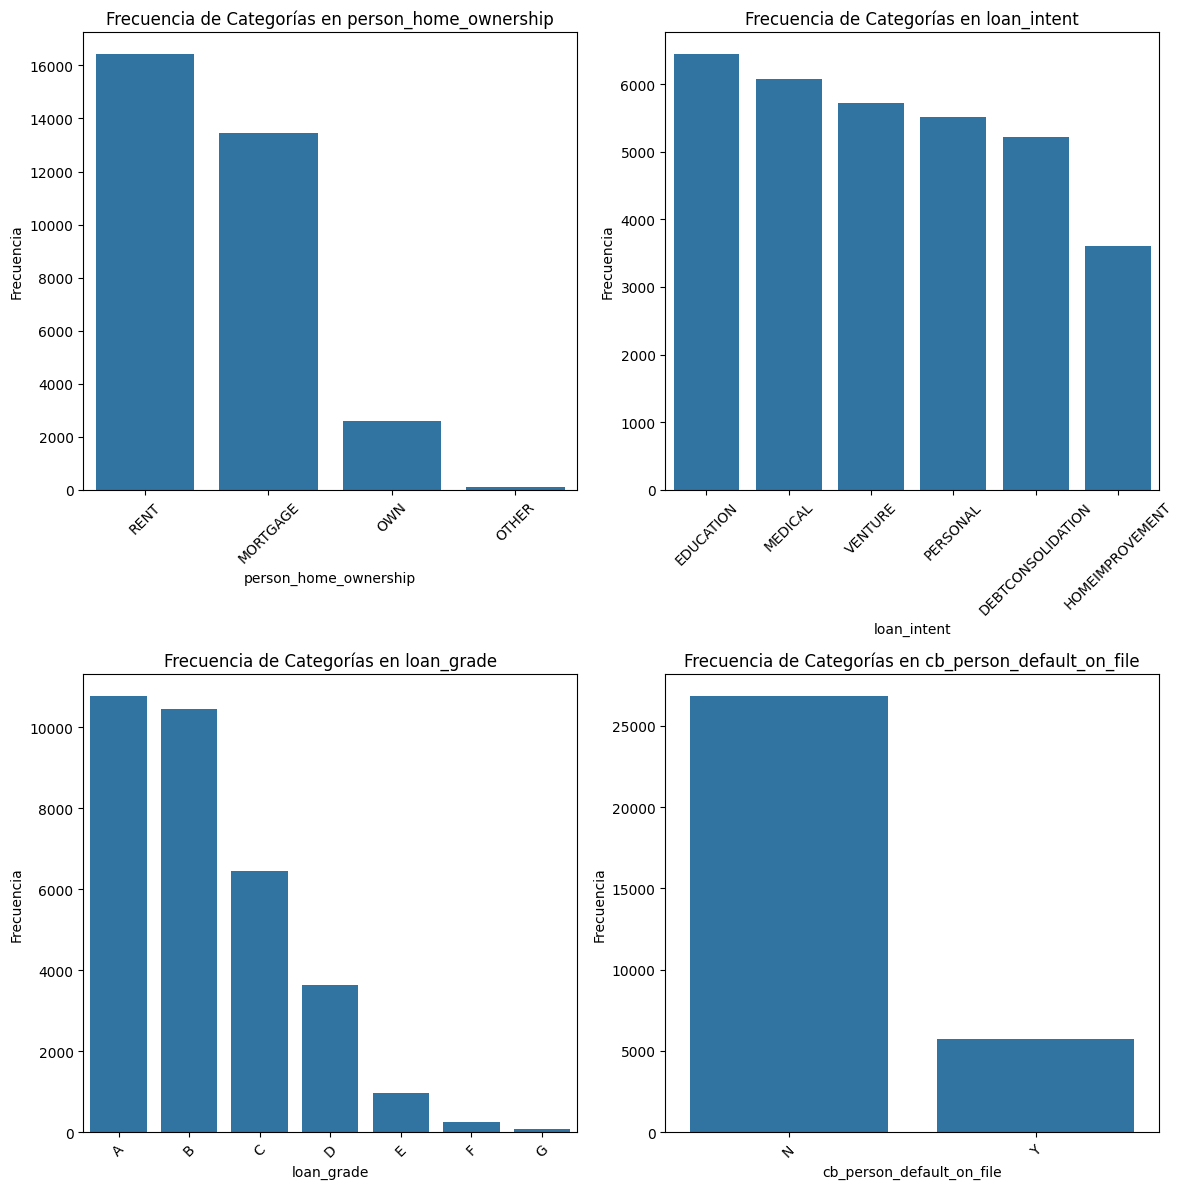

In [ ]:
# OTREA FORMA DE ORDENAR LAS GRÁFICAS.

# Variables categóricas
categorical_variables = df.select_dtypes(include = ['object']).columns.tolist()

# Crear subplots para los gráficos
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
axes = axes.ravel()

# Gráficas de barras para cada variable categórica.
for i, variable in enumerate(categorical_variables):
    # Frecuencia de cada categoría y ordenarla de mayor a menor.
    category_counts = df[variable].value_counts().sort_values(ascending = False)

    # Gráfico de barras ordenado en el subplot correspondiente.
    sns.countplot(x = variable, data = df, order = category_counts.index, ax = axes[i])

    axes[i].set_title(f'Frecuencia de Categorías en {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frecuencia')

    # Rota las etiquetas del eje x para una mejor visualización.
    axes[i].tick_params(axis = 'x', rotation = 45)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


# **Parte 2**. Análisis de Correlación (Bivariante y Multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Se analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`.
<br><br>Se interpreta el resultado:
Se tienen bastantes valores atípicos, adicionoalemnte, los cuartiles y el valor máximo tienen un valor más elevado con respecto a loan_percent_income (relación prestamo - ingreso) cuando el loan_status es 1(incumplimiento). Probablemente esto se deba a que se cobran más intereses caundo no se cumplen con los pagos del prestamo a tiempo, lo que generá mayores ingresos para la empresa prestamista.

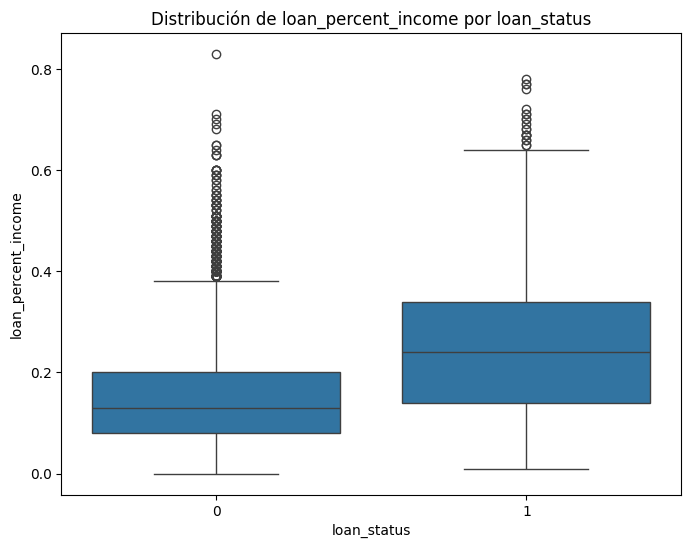

In [ ]:
# Crear un boxplot para visualizar la distribución de loan_percent_income según loan_status
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'loan_status', y = 'loan_percent_income', data = df)
plt.title('Distribución de loan_percent_income por loan_status')
plt.xlabel('loan_status')
plt.ylabel('loan_percent_income')
plt.show()

 9. Se separa en los gráficos de barras del ejercicio 7 el conteo según el `loan_status` utilizando el parámetro `hue`.

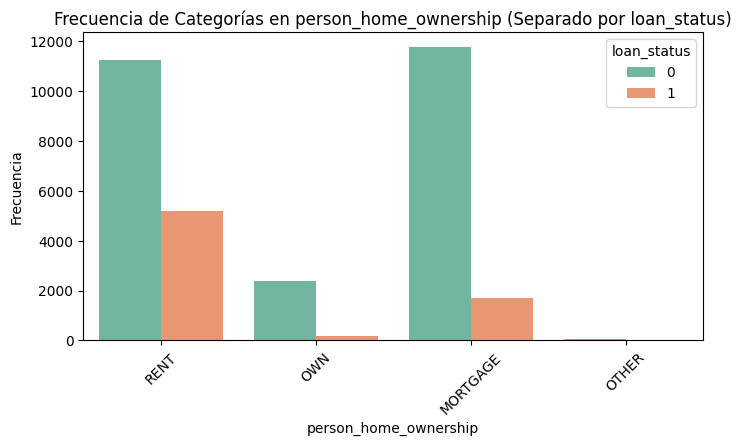

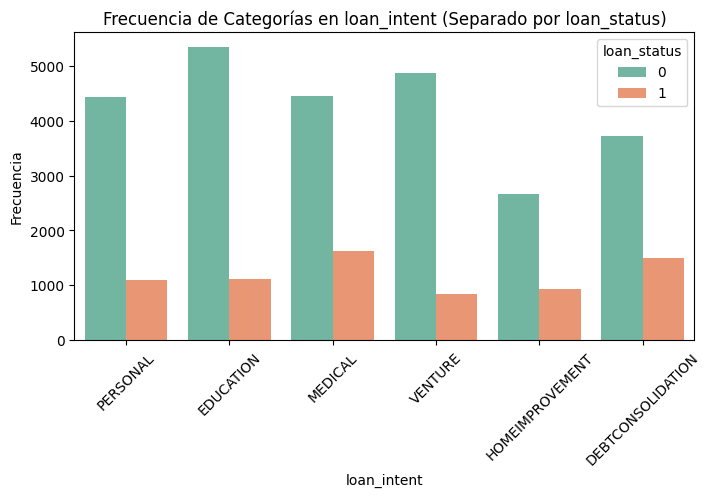

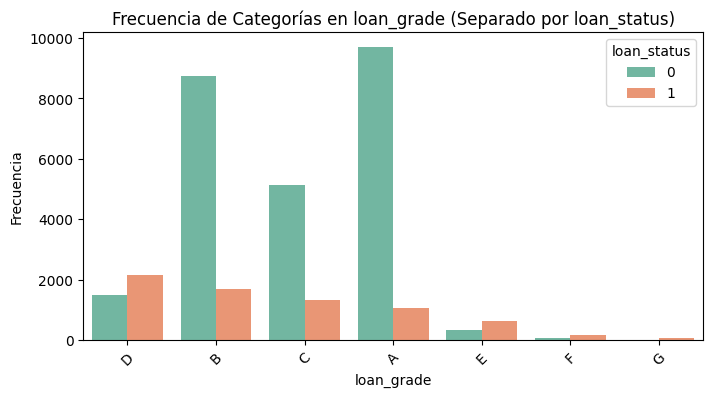

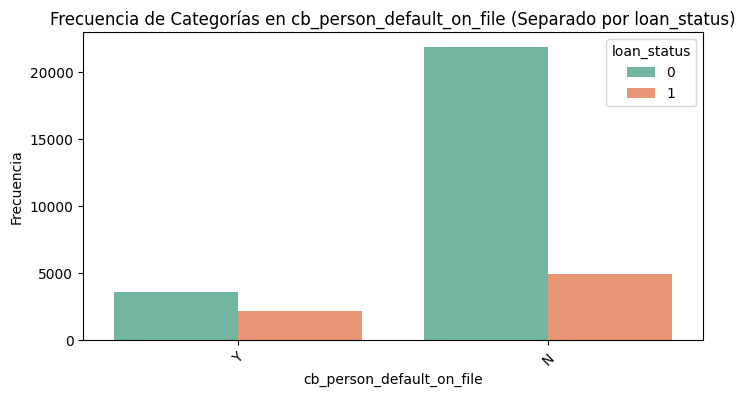

In [ ]:
# Variables categóricas.
categorical_variables = df.select_dtypes(include = ['object']).columns.tolist()

# Gráficas de barras para cada variable categórica con separación por loan_status.
for variable in categorical_variables:
    plt.figure(figsize = (8, 4))

    # Gráfica de barras con separación por loan_status utilizando hue.
    sns.countplot(x = variable, data = df, hue = 'loan_status', palette = 'Set2')

    plt.title(f'Frecuencia de Categorías en {variable} (Separado por loan_status)')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

    # Rotación de las etiquetas del eje x para una mejor visualización.
    plt.xticks(rotation = 45)
    plt.legend(title = 'loan_status')
    plt.show()

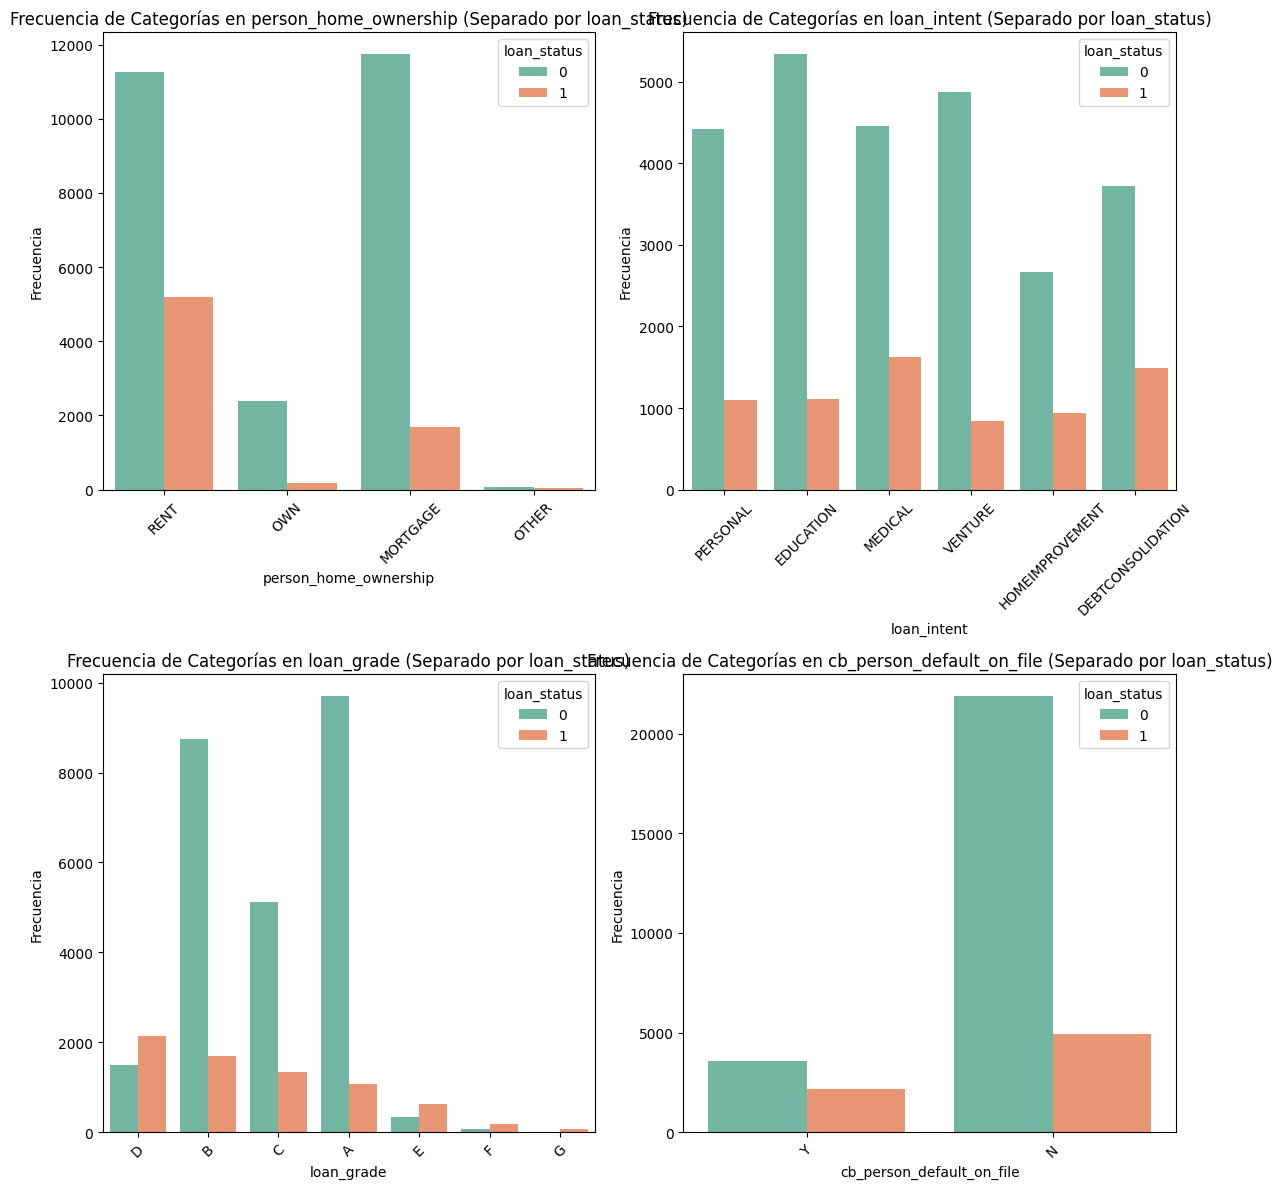

In [ ]:
# OTRA FORMA DE MOOSTRAR LAS GRÁFICAS.

# Variables categóricas
categorical_variables = df.select_dtypes(include = ['object']).columns.tolist()

# Subplots para los gráficos
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
axes = axes.ravel()

# Gráficas de barras para cada variable categórica con separación por loan_status.
for i, variable in enumerate(categorical_variables):
    plt.sca(axes[i])  # Seleccionar el subplot actual
    sns.countplot(x = variable, data = df, hue = 'loan_status', palette = 'Set2')

    plt.title(f'Frecuencia de Categorías en {variable} (Separado por loan_status)')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

    # Rotación de las etiquetas del eje x para una mejor visualización.
    plt.xticks(rotation = 45)
    plt.legend(title = 'loan_status')

# Eliminar subplots no utilizados
for i in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el espacio entre subplots
fig.tight_layout()

# Mostrar los gráficos
plt.show()


10. Mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`? loan_percent_income

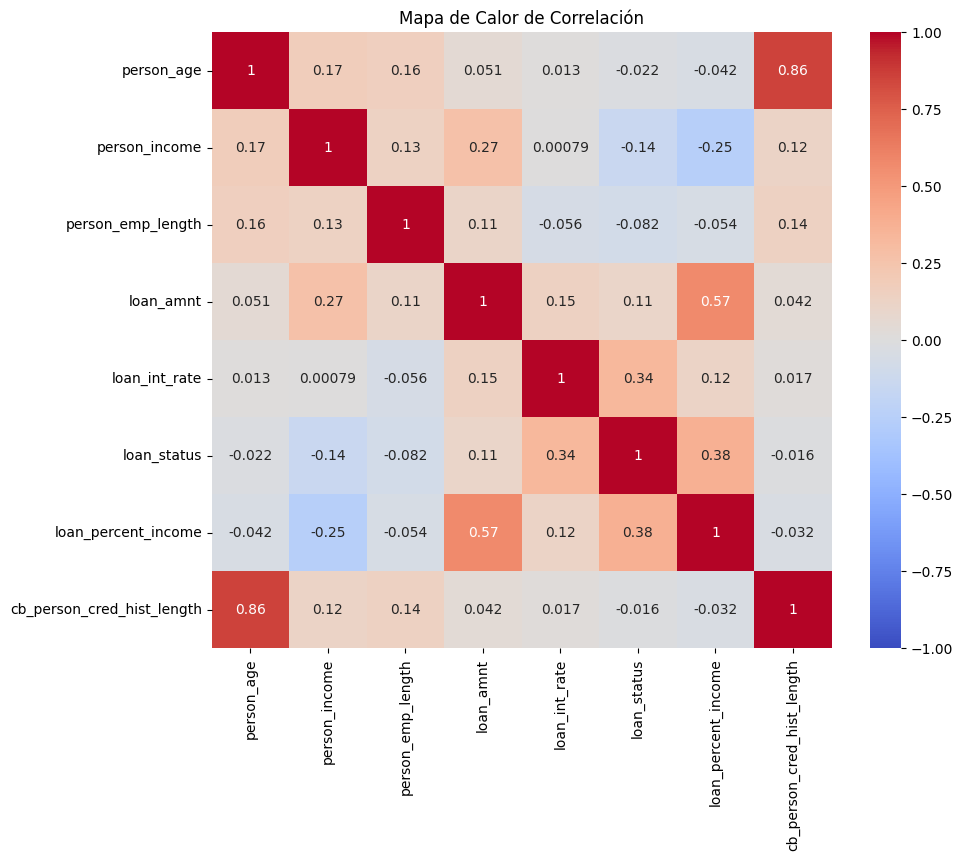

In [ ]:
# Calcular la matriz de correlación.
correlation_matrix = df.corr(numeric_only = True)

# Mapa de calor.
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Mapa de Calor de Correlación')
plt.show()